# BigMart Sales 회귀 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 데이터 로딩 및 전처리

In [59]:
df = pd.read_csv('Bigmart.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


* Item_Identifier와 Outlet_Identifier의 경우 항목이 너무 많고 실제 최종결과(Outlet sales)와 큰 연관성도 없어보이므로 삭제

In [60]:
df.drop(columns=['Item_Identifier', 'Outlet_Identifier'], inplace=True)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [61]:
np.unique(df['Item_Fat_Content'], return_counts=True)

(array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object),
 array([ 316, 5089, 2889,  112,  117], dtype=int64))

* Item_Fat_Content의 경우 LF = Low Fat = low fat이고 Regular = reg인 것으로 보이므로 각 명칭을 Low Fat와 Regular로 통일

In [62]:
# df.loc[df['Item_Fat_Content'].isin(['Low Fat', 'low fat']), 'Item_Fat_Content'] = 'LF'

In [63]:
df.loc[df['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
df.loc[df['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
df.loc[df['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


* 결측치 확인

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


* 결측치 처리 전 Item_Weight의 분포 확인

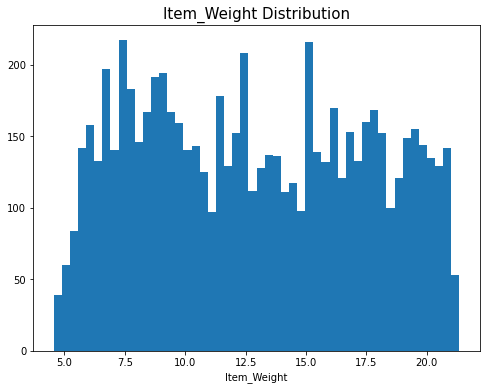

In [65]:
N = 8523
bins = 50
x = df['Item_Weight'].values

plt.figure(figsize=(8, 6))
plt.hist(x, bins = bins)
plt.xlabel('Item_Weight')
plt.title('Item_Weight Distribution', fontsize = 15)
plt.show()

* Item_Weight의 결측값을 이전값으로 채우기
* 평균으로 단일하게 채울 경우 1400개가 넘는 값이 단일 값으로 채워져 분포에 왜곡 발생 가능

In [66]:
round(df['Item_Weight'].mean(), 2)

12.86

In [67]:
df['Item_Weight'].fillna(method = 'pad', inplace=True)
df['Item_Weight'].isna().sum()

0

* Item_Weight 결측치 처리 후 데이터 분포

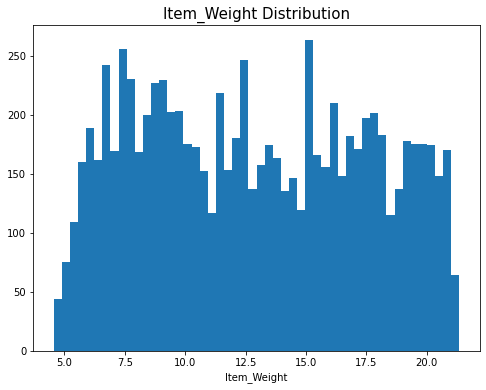

In [68]:
N = 8523
bins = 50
x = df['Item_Weight'].values

plt.figure(figsize=(8, 6))
plt.hist(x, bins = bins)
plt.xlabel('Item_Weight')
plt.title('Item_Weight Distribution', fontsize = 15)
plt.show()

* Outlet_Size의 결측치를 바로 전 값으로 채우기

In [69]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [70]:
df['Outlet_Size'].fillna(method = 'pad', inplace=True)
df['Outlet_Size'].isna().sum()

0

In [71]:
df['Outlet_Size'].value_counts()

Medium    3912
Small     3321
High      1290
Name: Outlet_Size, dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [73]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

* One-hot Encoding을 하려 했으나 category형 변수가 너무 많은 관계로 레이블 인코딩 시행
* 본래 다중선형회귀를 하려 했지만, 레이블 인코딩을 시행한 관계로 앙상블기법의 RandomForest로 대체하기로 한다

In [74]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
from sklearn.preprocessing import LabelEncoder

# items = list(np.unique(df['Outlet_Size']))
# encoder = LabelEncoder().fit_transform(items)
# print('인코딩 변환값 :', encoder)

In [ ]:
# for column in [df.columns[1], df.columns[3], df.columns[6], df.columns[7], df.columns[8]]:
#     print(column)

In [ ]:
# list(np.unique(df['Outlet_Size']))

In [ ]:
# 왜 안됐을까...?

# for column in [df.columns[1], df.columns[3], df.columns[6], df.columns[7], df.columns[8]]:
#     df.column = LabelEncoder().fit_transform(df.column)
#     print('인코딩 변환값 :', df.column)

In [101]:
df.Item_Fat_Content = LabelEncoder().fit_transform(df.Item_Fat_Content)
df.Item_Type = LabelEncoder().fit_transform(df.Item_Type)
df.Outlet_Size = LabelEncoder().fit_transform(df.Outlet_Size)
df.Outlet_Location_Type = LabelEncoder().fit_transform(df.Outlet_Location_Type)
df.Outlet_Type = LabelEncoder().fit_transform(df.Outlet_Type)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [103]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

* X 데이터의 정규화

In [105]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

### 2. 훈련/테스트 데이터셋 분리

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.1, random_state=2021
)

### 3. 학습, 훈련, 평가

In [107]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2021)
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
mse_rf = mean_squared_error(y_test, pred_rf)
rfr.score(X_test, y_test), mse_rf

(0.5069898582346983, 1355702.9754200445)

* PCA(주성분 분석) 시행시

In [114]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_std)
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.21161952, 0.13108168, 0.12012153, 0.1126907 , 0.10894203,
        0.09729343, 0.09464897, 0.08183782]),
 0.9582356805542066)